## Final Performance Plotting
Plot distribution on each tasks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
df = pd.read_csv("./eval_Freeway/8_final_perf_results.csv")
df = pd.read_csv("./eval_SpaceInvaders/10_final_perf_results.csv")
# plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体
# plt.rcParams['font.size'] = 20  # 设置全局文字大小

In [54]:
def plot_dist(df, name):
    algorithms = df['algorithm'].tolist()
    # 提取任务ID列（从第二列开始）
    task_ids = df.columns[1:-1].astype(int).tolist()
    # 柱的宽度
    bar_width = 0.10
    # 横坐标偏移量
    index_offsets = np.arange(len(task_ids))
    plt.figure(figsize=(12, 6))
    cmap = plt.get_cmap('viridis')
    colors = [
        "#4C72B0",  # 深蓝色
        "#DD8452",  # 暖橙色
        "#55A868",  # 深绿色
        "#C44E52",  # 深红色
        "#8172B3",  # 紫罗兰色
        "#937860",  # 咖啡色
        "#DA8BC3",  # 粉紫色
        "#8C8C8C",  # 中性灰
        "#CCB974",  # 金色
        "#64B5CD"   # 浅蓝色
    ]

    # 遍历每个算法，绘制对应的直方图柱
    for i, algorithm in enumerate(algorithms):
        values = df.iloc[i, 1:-1].tolist()
        color = cmap(i / len(algorithms))
        plt.bar(index_offsets + i * bar_width, values, width=bar_width, label=algorithm, color=colors[i])
        
    # 设置x轴标签
    plt.xlabel('Task ID')
    # 设置y轴标签
    plt.ylabel('Performance')
    # 设置图表标题
    plt.title(f'Performance by Task ID on {name}')
    # 添加图例
    plt.legend()
    # 显示图表
    plt.show()
    
def plot_lines(df, name, algorithms=None):
    if algorithms is None:
        algorithms = df['algorithm'].tolist()

    # 提取任务ID列（从第二列开始）
    task_ids = df.columns[1:-1].astype(int).tolist()
    plt.figure(figsize=(12, 6))
    cmap = plt.get_cmap('viridis')
    colors = [
        'blue',
        'red',
        'orange',
        'green',
        'purple',
        'brown',
        'pink',
        'gray',
        'gold',
        'cyan'
    ]

    # 遍历每个算法，绘制对应的直方图柱
    for i, algorithm in enumerate(algorithms):
        values = df[df['algorithm'] == algorithm].iloc[0, 1:-1].tolist()
        color = cmap(i / len(algorithms))
        if algorithm == "F1":
            plt.plot(values, label='baseline', color=colors[i], marker='o', linestyle='--')
        else:
            plt.plot(values, label=algorithm, color=colors[i], marker='o')
    plt.rcParams.update({'font.size': 12})
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # 设置x轴标签
    plt.xlabel('Task ID')
    # 设置y轴标签
    plt.ylabel('Performance')
    # 设置图表标题
    plt.title(f'Performance by Task ID on {name}')
    # 添加图例
    plt.legend()
    # 显示图表
    plt.show()
    plt.close()

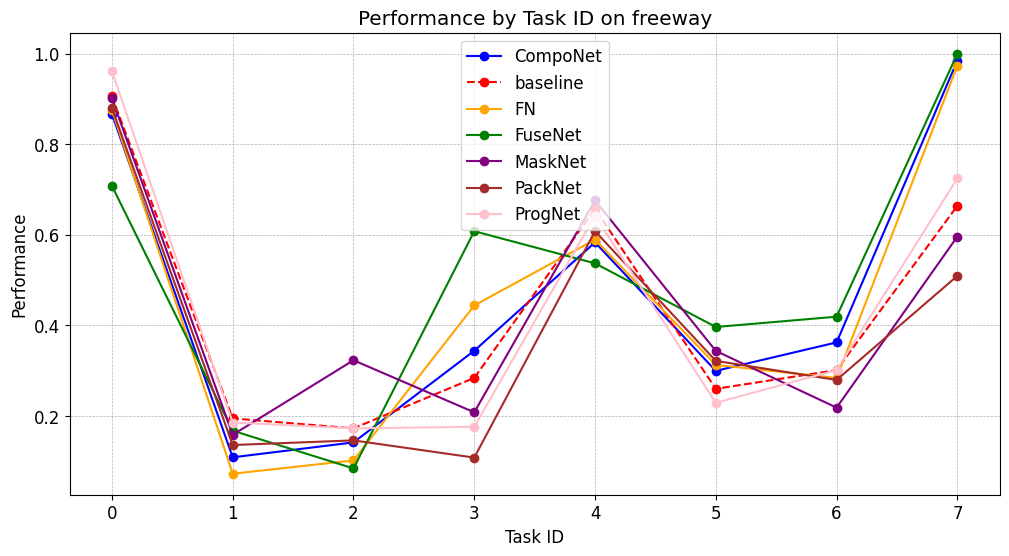

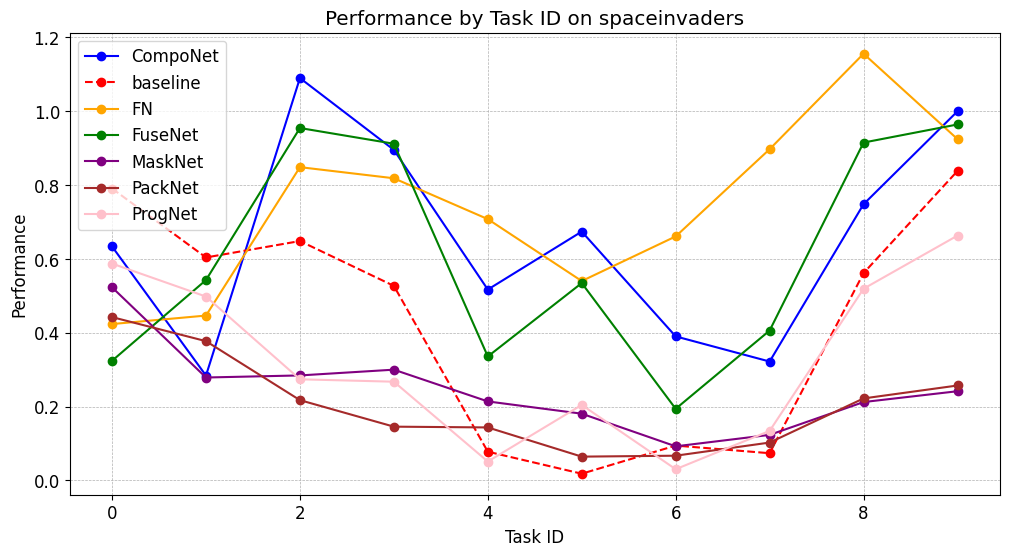

In [55]:
# algorithms = ['FuseNet','CompoNet','MaskNet','F1']
algorithms = None
df = pd.read_csv("./eval_Freeway/8_final_perf_results.csv")
plot_lines(df,"freeway", algorithms)
df = pd.read_csv("./eval_SpaceInvaders/10_final_perf_results.csv")
plot_lines(df,"spaceinvaders", algorithms)

## Plot Rewards Curves

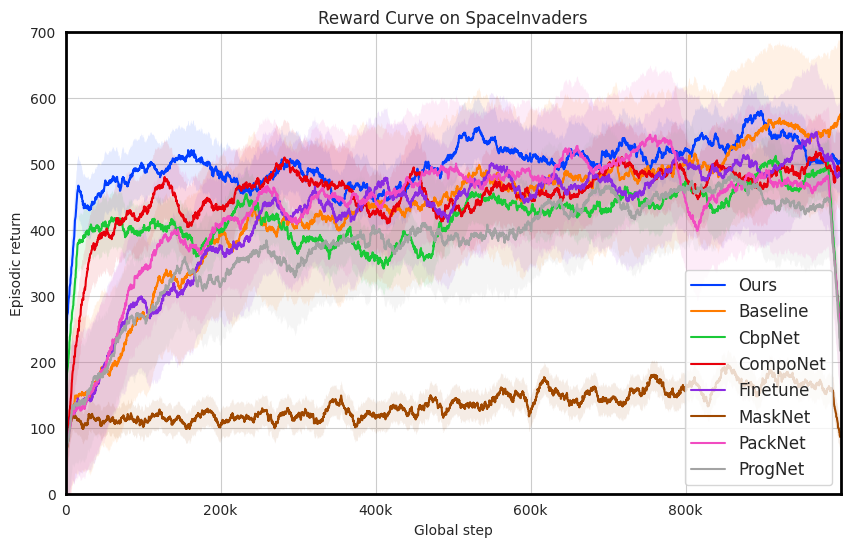

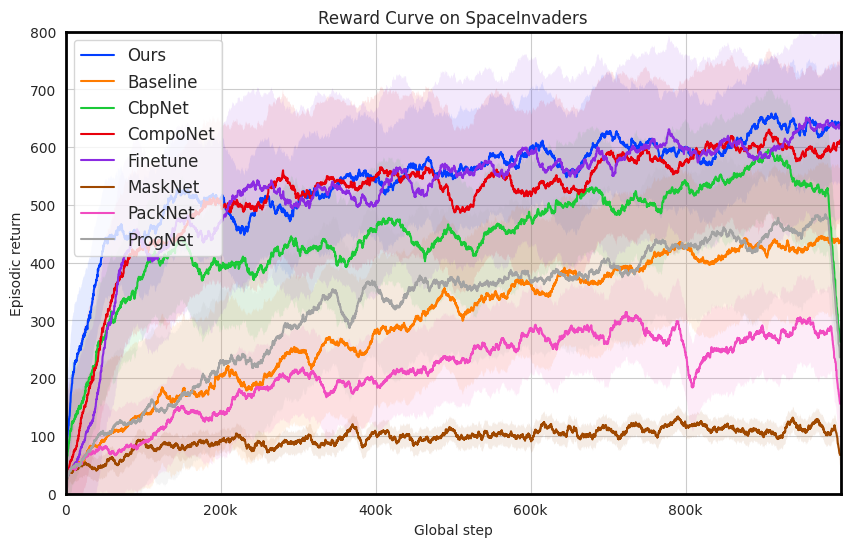

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def smooth(y, weight=0.99):
    """
    平滑函数，使用指数加权移动平均
    :param y: 原始数据
    :param weight: 平滑权重，取值范围 [0, 1]，越接近 1 越平滑
    :return: 平滑后的数据
    """
    last = y[0]
    smoothed = []
    for point in y:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return np.array(smoothed)

def moving_average(y, window_size=5):
    return np.convolve(y, np.ones(window_size)/window_size, mode='same')

# colors = {'Baseline': 'red', 'Rewire': 'blue', 'FT': 'gray'}
linestyles = {'Baseline': 'solid', 'Rewire': 'dashed', 'FT': 'dotted'}

# methods = ["Baseline", "CbpNet", "CompoNet", "Finetune", "FuseNet", "MaskNet", "PackNet", "ProgNet"]
# methods = ["FuseNetwMerge", "Baseline", "CbpNet", "CompoNet", "MaskNet", "PackNet", "ProgNet"]
methods = ["FuseNet", "Baseline", "CbpNet", "CompoNet", "Finetune",  "MaskNet", "PackNet", "ProgNet"]
colors = sns.color_palette("bright", len(methods))
colors = {method: colors[i] for i, method in enumerate(methods)}

modes = [1,5]
# modes = range(8)
ylims = [1000,700,0,0,1000,800]
# ylims = [30 for _ in modes]
# env = 'Freeway'
env = 'SpaceInvaders'

sns.set_style("whitegrid")
for mode in modes:
    fig, ax = plt.subplots(figsize=(10, 6))
    for method in methods:
        data = pd.read_csv(f'./{env}/Rewards/{method}/{mode}/returns.csv')
        steps = data['global_step']
        rewards = data['episodic_return']
        # smoothed_rewards = smooth(rewards,0.91)
        smoothed_rewards = moving_average(rewards,150)
        std = np.std(smoothed_rewards)
        if method in ["FuseNet","FuseNetwMerge"]:
            label = "Ours"
        else :
            label = method
        plt.plot(steps, smoothed_rewards, label=label, color=colors[method], linestyle="solid")
        plt.fill_between(steps, 
                        smoothed_rewards - std, 
                        smoothed_rewards + std, 
                        edgecolor='none',
                        linewidth=0,
                        color=colors[method], alpha=0.1)

    x_ticks = np.linspace(0, 8e5, 5)  # 生成 5 个等间距的刻度
    x_tick_labels = [f'{int(tick/1000)}k' if tick != 0 else '0' for tick in x_ticks]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels)

    ax.set_xlim(0, 1e6)
    ax.set_ylim(0, ylims[mode])
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')
    ax.legend(fontsize=12)
    # 添加轴标签和标题
    plt.xlabel('Global step')
    plt.ylabel('Episodic return')
    plt.title(f'Reward Curve on {env}')

    # 显示图形
    plt.show()
    plt.close()